In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as pyo
from plotly.subplots import make_subplots

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [52]:
pyo.init_notebook_mode()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(18,9))

data = pd.read_csv('../data/BankChurners.csv')
data = data[data.columns[:-2]] ## Naive Bayes class of the last cols
print(data.head(6)) ## Take a cursory look at the data

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   

   Months_on_book  ...  M

In [53]:
fig = make_subplots(rows=2, cols=1) ##Check the Box chart and Histogram Chart of customers' age

age_box         = go.Box(x = data['Customer_Age'],       name = 'Box plot of age distribution', boxmean=True)
age_histogram   = go.Histogram(x = data['Customer_Age'], name = 'Age Distribution Histogram')

fig.add_trace(age_box,       row = 1, col = 1)
fig.add_trace(age_histogram, row = 2, col = 1)

# Update the layout
fig.update_layout(
    title={
        'text': 'Distribution of Customer Ages',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=600, 
    width=1000,
    xaxis=dict(title='Age')
)
fig.show() #Customer_Age: customers' age

In [56]:
labels = data['Gender'].unique()
values = data['Gender'].value_counts()

# Red is female, blue is male
colors = ['#ff7f7f', '#7fbfff']

fig = go.Figure(
    data=[go.Pie(
        labels=labels, 
        values=values,
        marker=dict(colors=colors)
    )]
)

fig.update_layout(
    title={
        'text': 'Customer gender distribution pie chart',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show() #Gender: customers' gender

In [57]:
fig = make_subplots(rows=2, cols=1)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray']
opacity = 0.6

tr1 = go.Box(x=data['Dependent_count'], name='Dependent count Box Plot', boxmean=True)
tr2 = go.Histogram(x=data['Dependent_count'], name='Dependent count Histogram', marker=dict(color=colors, opacity=opacity))

fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

fig.update_layout(
    title={
        'text': 'Distribution of Dependent Counts (Close Family Size)',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=800,
    xaxis_title='Dependent Count',
    yaxis_title='Count'
)

fig.show() # Dependent_count: Customers' family size

In [58]:
Marital_Status_Amount = data.groupby('Marital_Status').size().reset_index(name='count')

fig = ex.pie(Marital_Status_Amount, names='Marital_Status', values='count', title='Marriage Status Distribution of Customers')

fig.update_layout(
    title={
        'text': 'Propotion Of Different Marriage Statuses',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show() #Marital_Status: the status of the customers' marital status(marriaged/single/unknown/divorced)

In [59]:
income_counts = data.groupby('Income_Category').size().reset_index(name='count')

income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray']
opacity = 0.6

# Convert Income_Category to a categorical variable with the desired order
income_counts = income_counts.set_index('Income_Category').loc[income_order].reset_index()

# Create the bar chart
fig = ex.bar(income_counts, x='Income_Category', y='count', title='Distribution Of Customers Income', color=colors, opacity=opacity)

fig.update_layout(
    xaxis_title='Income Category',
    yaxis_title='Count',
    width = 800,
    height = 500,
    title={
        'text': 'Distribution Of Customers Income',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show() # Income_Category: The income situation of the customers

In [60]:
fig = ex.pie(data,names='Card_Category',title='The Proportion of Credit Card Types Held by Customers')

fig.update_layout(
    xaxis_title='Card_Category',
    yaxis_title='Count',
    title={
        'text': 'The Proportion of Credit Card Types Held by Customers',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show() # Card_Category

In [61]:
fig = make_subplots(rows=2, cols=1)##Check the Box chart and Histogram Chart of book_histogram

fig = make_subplots(rows=2, cols=1) 

book_box         = go.Box(x = data['Months_on_book'],       name = 'Box plot of Months_on_book distribution', boxmean=True)
book_histogram   = go.Histogram(x = data['Months_on_book'], name = 'Months_on_book Distribution Histogram')

fig.add_trace(book_box,       row = 1, col = 1)
fig.add_trace(book_histogram, row = 2, col = 1)

# Update the layout
fig.update_layout(
    title={
        'text': 'Distribution of book_histogram',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=800,
    xaxis=dict(title='Amount')
)
fig.show() # monthly bills of each customers

In [62]:
total_products_counts = data['Total_Relationship_Count'].value_counts()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray']

fig = go.Figure(
    data=[go.Bar(
    y=total_products_counts.index,
    x=total_products_counts.values,
    orientation='h', # horizontal output
    marker=dict(
    color=colors,
    opacity=0.6)
    )]
)

fig.update_layout(
title={
    'text': 'Distribution of Total Amount of products held by the customers',
    'x': 0.5,
    'y': 0.95,
    'xanchor': 'center',
    'yanchor': 'top'
    },
    xaxis_title='Count',
    yaxis_title='Total Amount of products',
    height=400,
    width=800
)

fig.show() # Total_Relationship_Count: Total amount of bank's products held by the customers

In [63]:
fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(y=data['Months_Inactive_12_mon'], 
             name='Number of Months Inactive', 
             boxmean=True, 
             marker=dict(color='#1f77b4'))

tr2 = go.Bar(x=data['Months_Inactive_12_mon'].value_counts().index, 
             y=data['Months_Inactive_12_mon'].value_counts().values, 
             name='Number of Customers', 
             marker=dict(color='#ff7f0e', opacity=0.6))

fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

fig.update_layout(height = 600, width = 800, 
                  title_text = "Distribution of inactive months over the past 12 months",
                  title_x = 0.5, 
                  title_y = 0.95, 
                  xaxis_title = 'Number of Months Inactive', 
                  yaxis_title = 'Number of Customers')

fig.show() # Months_Inactive_12_mon: Total amount of mounths not be active during 12 months before

In [64]:
fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(y=data['Credit_Limit'], 
             name='Value of Credit Limit', 
             boxmean=True)

tr2=go.Histogram(x=data['Credit_Limit'],name='Credit_Limit Histogram')

fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

fig.update_layout(height = 600, width = 800, 
                  title_text = "Distribution of Credit Limit",
                  title_x = 0.5, 
                  title_y = 0.95, 
                  xaxis_title = 'Value of Credit Limit', 
                  yaxis_title = 'Number of Customers')

fig.show() # Credit_Limit: The card's limited amount of money

In [66]:
fig = make_subplots(rows=2, cols=1)

Trans_Amt_Box = go.Box(x=data['Total_Trans_Amt'],
                       name='Total_Trans_Amt Box Plot',
                       boxmean=True, marker=dict(color='#1f77b4', opacity=0.6))
Trans_Amt_Histogram = go.Histogram(x=data['Total_Trans_Amt'],
                                   name='Total_Trans_Amt Histogram', 
                                   marker=dict(color='#ff7f0e', opacity=0.6))

fig.add_trace(Trans_Amt_Box,row=1,col=1)
fig.add_trace(Trans_Amt_Histogram,row=2,col=1)

fig.update_layout(height=600, width=1000, title_text="Distribution of the Total Transaction Amount (Last 12 months)")
fig.show() # Total_Trans_Amt: Total transactions of each customers

In [67]:
fig = ex.pie(data, names='Attrition_Flag', title='Proportion of customers(Existing/Attrited)')

fig.update_traces(marker=dict(colors=['#1f77b4','#ff7f0e'], line=dict(color='#FFFFFF', width=2)))

fig.update_layout(title={'text': 'Proportion of customers(Existing/Attrited)', 'x':0.5})

fig.show() # Attrition_Flag: whether is still the vip churners of the bank

In [86]:
data = pd.read_csv('../data/BankChurners.csv')
data = data[data.columns[:-2]]

data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data.Gender = data.Gender.replace({'F':1,'M':0})

data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1) # Platinum never be attrited

data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

<AxesSubplot: >

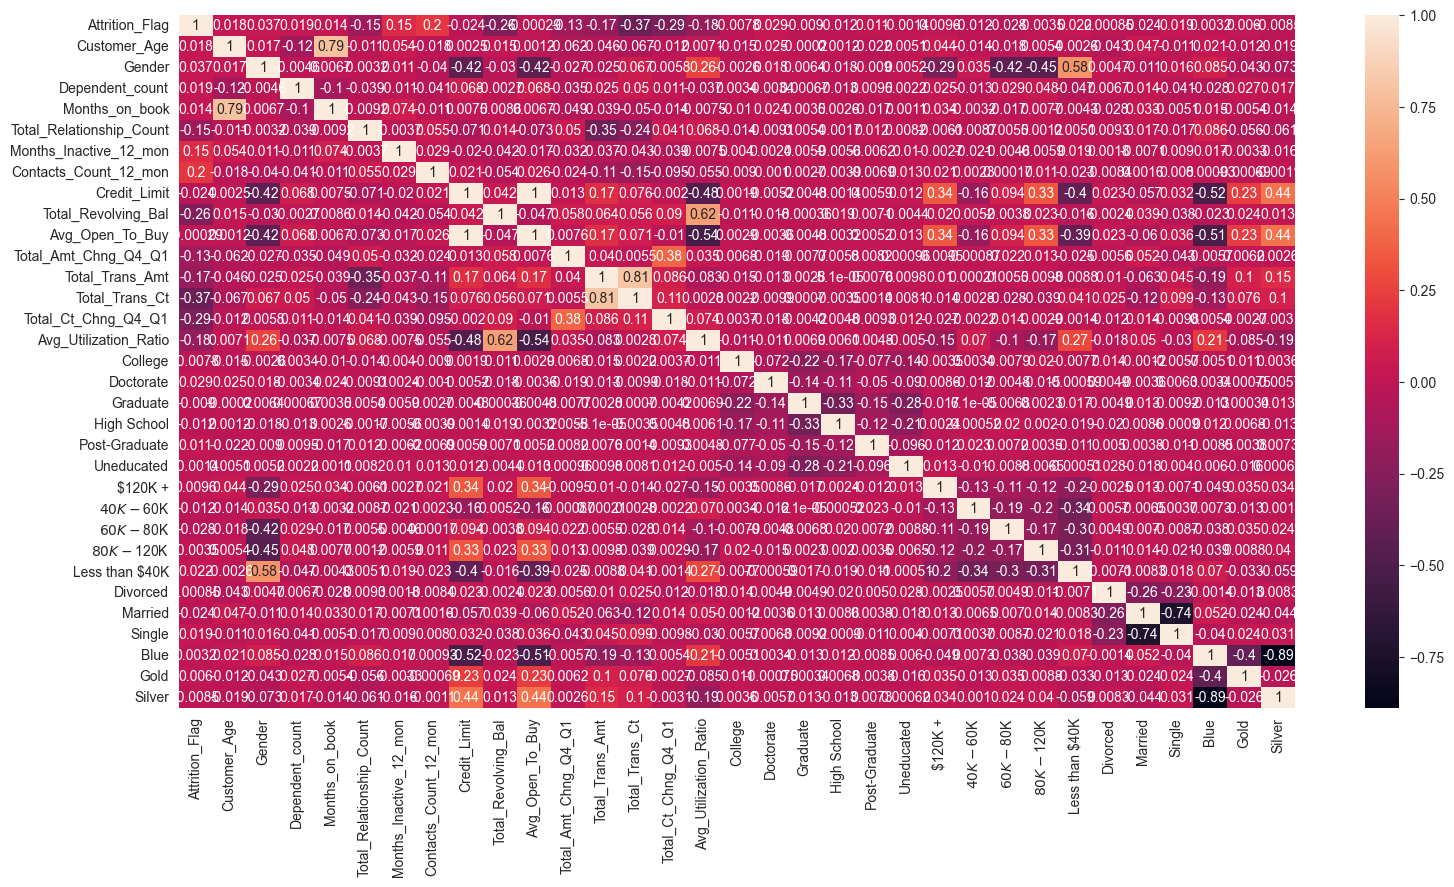

In [87]:
sns.heatmap(data.corr('pearson'),annot=True)

<AxesSubplot: >

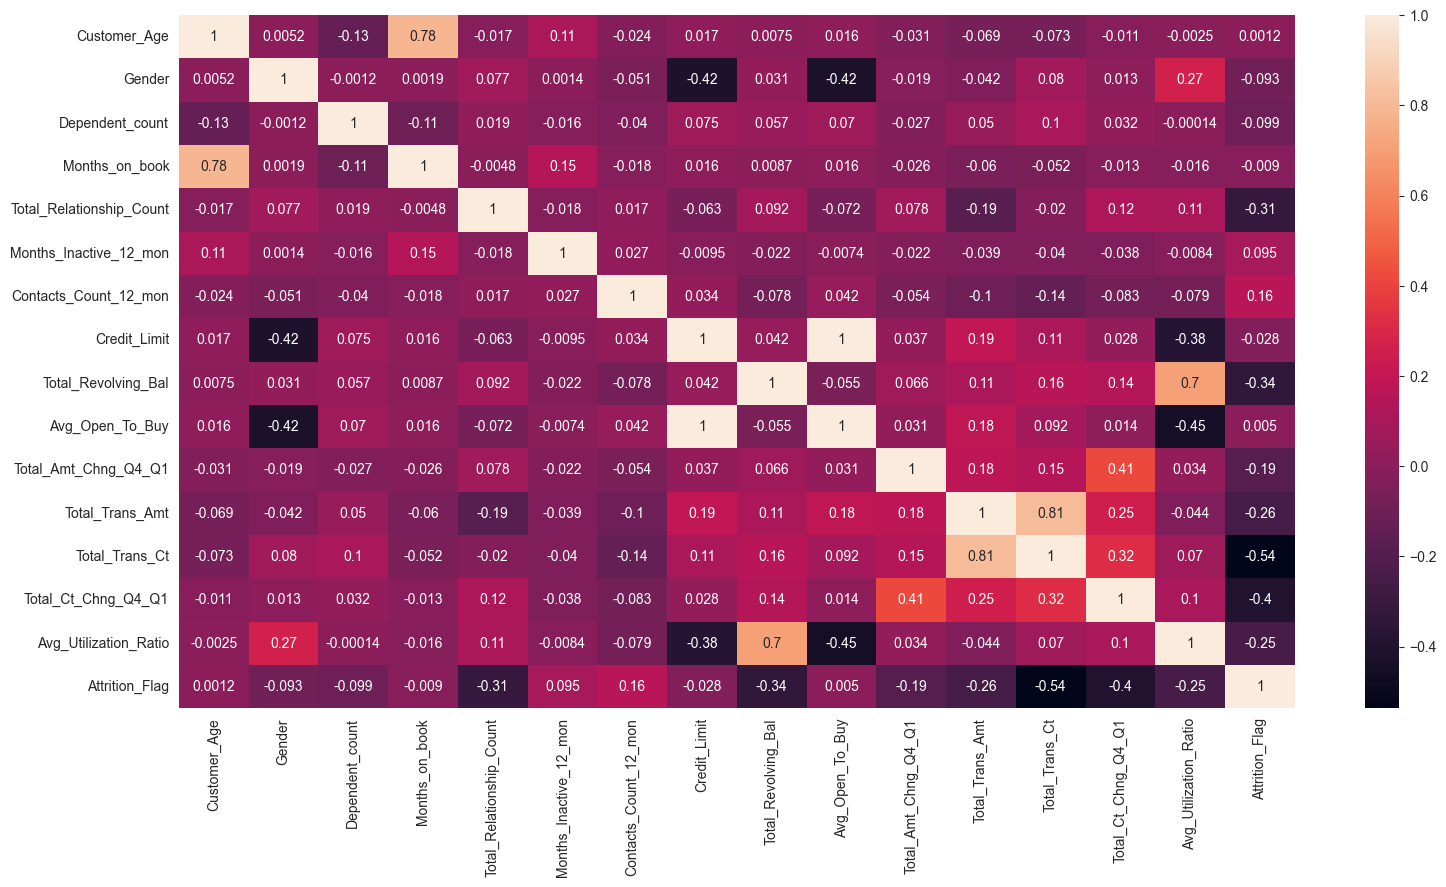

In [77]:
# Oversample the dataset using SMOTE to balance the target variable and features
oversample = SMOTE()
# X: variables, y: target
X, y = oversample.fit_resample(data[data.columns[1:]], data[data.columns[0]])
usampled_df = X.assign(Attrition_Flag = y) #

# Copy the hot code variables, delte them from usampled_df
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy() 

# Remove the categorical features after One-Hot Encoding, delete usampled_df.columns[15:-1]
usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

# The heat map only shows the relationship between numerical features
sns.heatmap(usampled_df.corr('pearson'),annot=True)

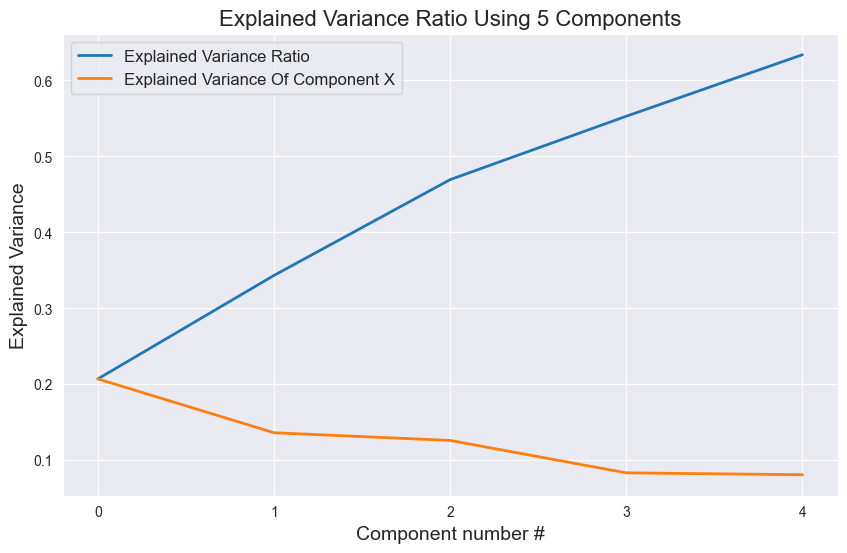

In [88]:
N_COMPONENTS = 5

# PCA
pca_model = PCA(n_components=N_COMPONENTS)
# Apply PCA model for dimensionality reduction
pc_matrix = pca_model.fit_transform(ohe_data)

# The proportion of variance explained by each principal component to the total variance
evr = pca_model.explained_variance_ratio_
# The sum
cumsum_evr = np.cumsum(evr)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the explained variance ratio
sns.lineplot(x=np.arange(0, len(cumsum_evr)), y=cumsum_evr, label='Explained Variance Ratio', linewidth=2, ax=ax)
# Plot the explained variance of component X
sns.lineplot(x=np.arange(0, len(cumsum_evr)), y=evr, label='Explained Variance Of Component X', linewidth=2, ax=ax)

ax.set_xticks([i for i in range(0, len(cumsum_evr))])
# Set x and y axis labels
ax.set_xlabel('Component number #', fontsize=14)
ax.set_ylabel('Explained Variance', fontsize=14)

# Set the title
ax.set_title(f'Explained Variance Ratio Using {N_COMPONENTS} Components', fontsize=16)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()

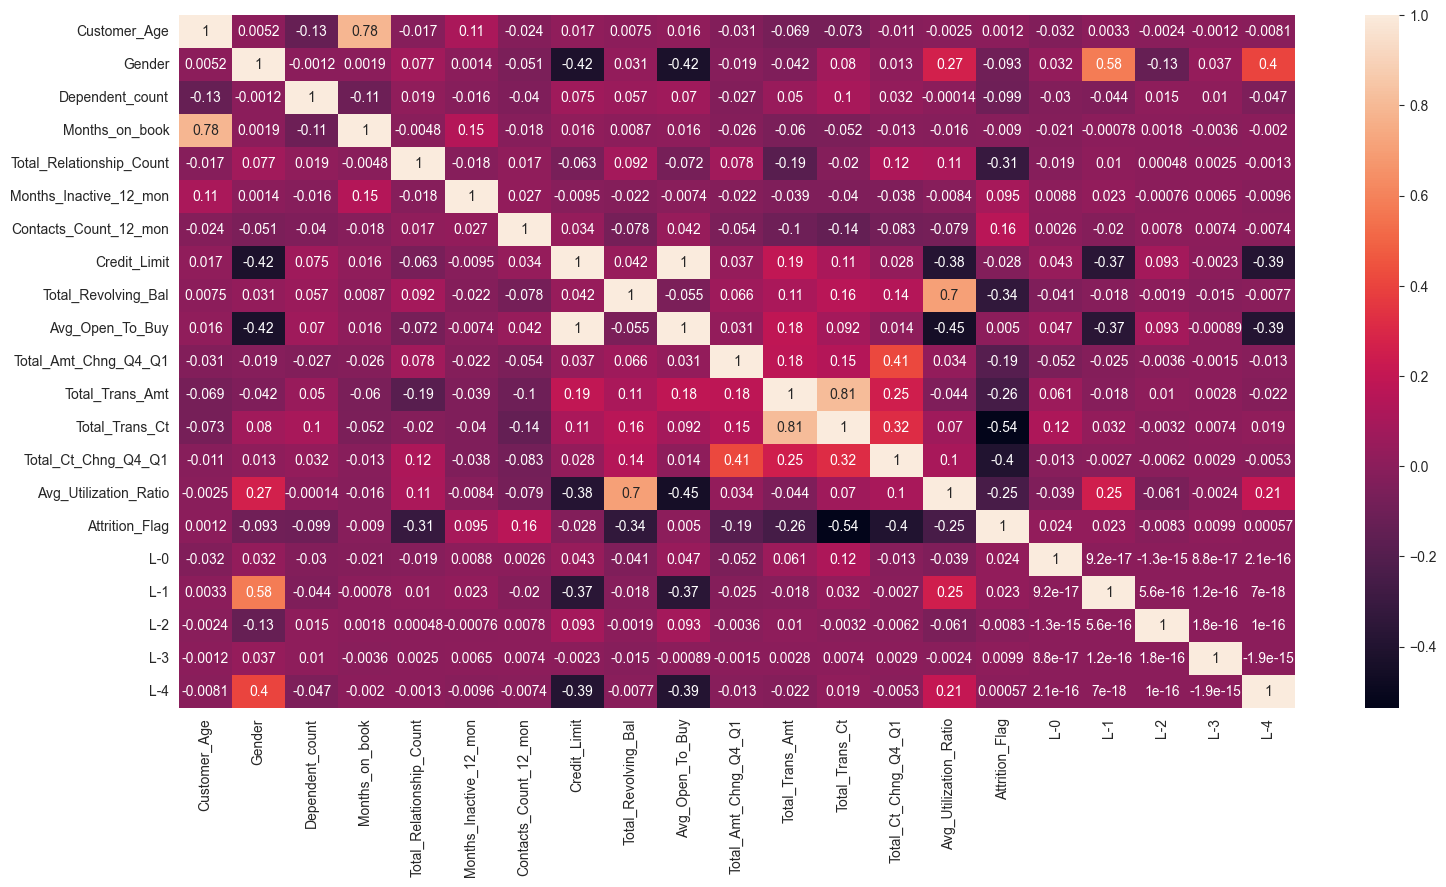

<AxesSubplot: >

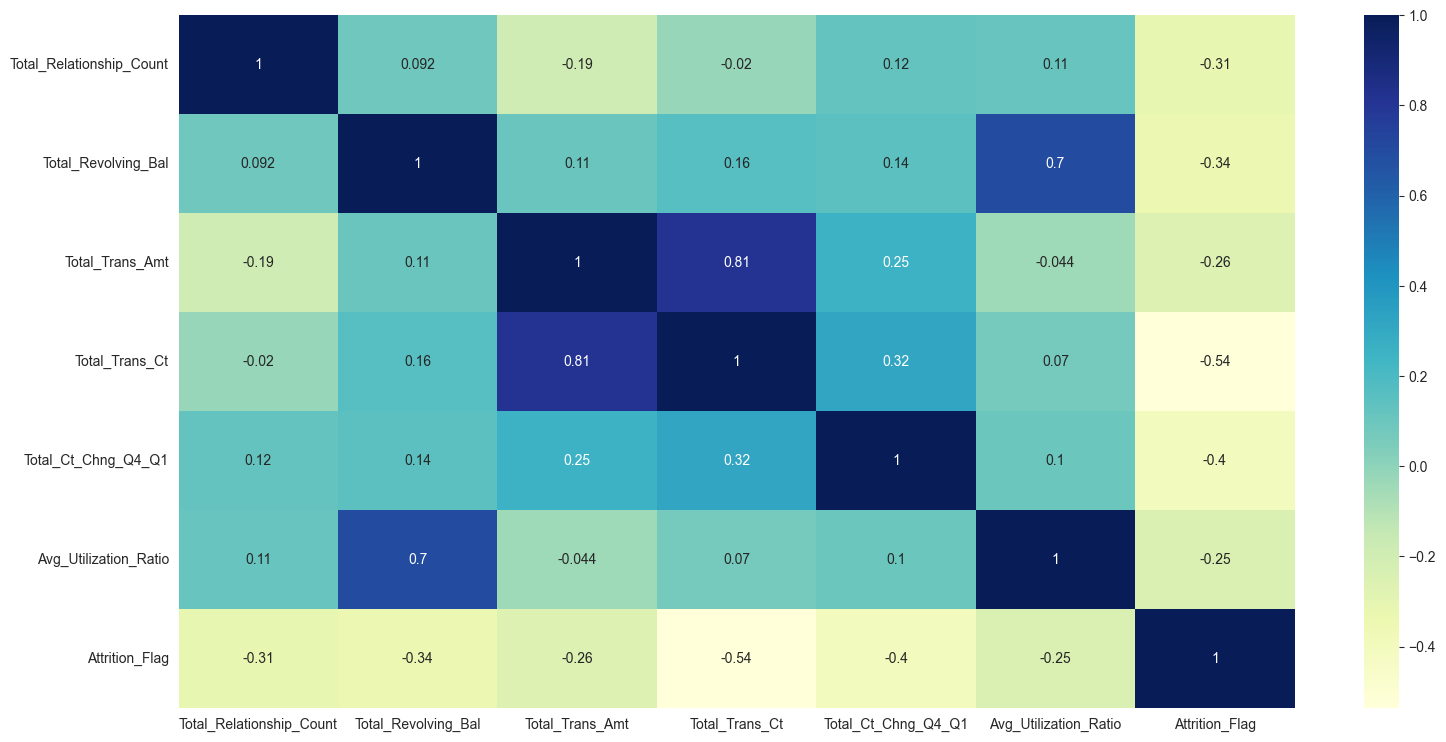

In [89]:
new_data = pd.concat([usampled_df,
                                  pd.DataFrame(pc_matrix,columns=['L-{}'.format(i) for i in range(0,N_COMPONENTS)])],
                                 axis=1)
sns.heatmap(new_data.corr('pearson'),annot=True)
plt.show()

# Define the correlation threshold
threshold = 0.2

# Calculate the correlation matrix
corr_matrix = new_data.corr('pearson')

# Filter the variables with a correlation higher than the threshold
strong_correlations = corr_matrix[abs(corr_matrix['Attrition_Flag']) > threshold].index

# Create a subset of the correlation matrix containing only strongly correlated variables
filtered_corr_matrix = corr_matrix.loc[strong_correlations, strong_correlations]

# Create a heatmap with a blue-green color palette
sns.heatmap(filtered_corr_matrix, annot=True, cmap="YlGnBu")


In [91]:
Strong_features = ['Total_Relationship_Count', 'Total_Revolving_Bal',  'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'L-3']

ohe_data =data[data.columns[16:]].copy()
print(data.shape)
print(data.head(3))
pc_matrix = pca_model.transform(ohe_data)
df = pd.concat([data,pd.DataFrame(pc_matrix,columns=['L-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

df = df[Strong_features]
df['Attrition_Flag'] = data['Attrition_Flag']

# Save the new DataFrame as a CSV file
df.to_csv("../data/Data_New.csv", index=False)

(10127, 33)
   Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               0            45       0                3              39   
1               0            49       1                5              44   
2               0            51       0                3              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  $40K - $60K  $60K - $80K  \
0       12691.0                  777  ...            0            1   
1        8256.0                  864  ...            0            0   
2        3418.0                    0  ...            0            0   

   $80K - $120K  Less than $40K  Divorced  Married  Single  Blue  Gold  Silver  
0   